In [10]:
import pandas as pd

### 方法一

In [11]:
data = {'weekday': ['Sun', 'Sun', 'Mon', 'Mon'],
        'city': ['Austin', 'Dallas', 'Austin', 'Dallas'],
        'visitor': [139, 237, 326, 456]}

In [12]:
visitors_1 = pd.DataFrame(data)
print(visitors_1)

  weekday    city  visitor
0     Sun  Austin      139
1     Sun  Dallas      237
2     Mon  Austin      326
3     Mon  Dallas      456


### 方法二

In [13]:
cities = ['Austin', 'Dallas', 'Austin', 'Dallas']
weekdays = ['Sun', 'Sun', 'Mon', 'Mon']
visitors = [139, 237, 326, 456]

list_labels = ['city', 'weekday', 'visitor']
list_cols = [cities, weekdays, visitors]

zipped = list(zip(list_labels, list_cols))

In [14]:
visitors_2 = pd.DataFrame(dict(zipped))
print(visitors_2)

     city weekday  visitor
0  Austin     Sun      139
1  Dallas     Sun      237
2  Austin     Mon      326
3  Dallas     Mon      456


## 一個簡單例子
假設你想知道如果利用 pandas 計算上述資料中，每個 weekday 的平均 visitor 數量，

通過 google 你找到了 https://stackoverflow.com/questions/30482071/how-to-calculate-mean-values-grouped-on-another-column-in-pandas

想要測試的時候就可以用 visitors_1 這個只有 4 筆資料的資料集來測試程式碼

In [15]:
visitors_1.groupby(by="weekday")['visitor'].mean()

weekday
Mon    391
Sun    188
Name: visitor, dtype: int64

## 練習時間
在小量的資料上，我們用眼睛就可以看得出來程式碼是否有跑出我們理想中的結果

請嘗試想像一個你需要的資料結構 (裡面的值可以是隨機的)，然後用上述的方法把它變成 pandas DataFrame

#### Ex: 想像一個 dataframe 有兩個欄位，一個是國家，一個是人口，求人口數最多的國家

### Hints: [隨機產生數值](https://blog.csdn.net/christianashannon/article/details/78867204)

In [16]:
import pandas as pd
import numpy as np
import random

In [17]:
data = {'國家':["TAIWAN","USA","CHINA"],
        '人口':[random.randint(0,9999), random.randint(0,9999), random.randint(0,9999)]}
df = pd.DataFrame(data)
print(df)
df.max()

       國家    人口
0  TAIWAN  4193
1     USA  1537
2   CHINA  9640


國家     USA
人口    9640
dtype: object

## 使用內建功能讀取 txt 檔

In [18]:
with open("data/examples/example.txt", 'r') as f:
    data = f.readlines()
print(data)

['id,sex,age,score\n', '001,F,20,77\n', '002,F,25,90\n', '003,M,22,80\n', '004,F,30,66\n', '005,M,40,60\n', '006,M,29,87']


## 將 txt 轉成 pandas dataframe

In [19]:
import pandas as pd

data = []
with open("data/examples/example.txt", 'r') as f:
    for line in f:
        line = line.replace('\n', '').split(',') # 將每句最後的 /n 取代成空值後，再以逗號斷句
        data.append(line)
data

[['id', 'sex', 'age', 'score'],
 ['001', 'F', '20', '77'],
 ['002', 'F', '25', '90'],
 ['003', 'M', '22', '80'],
 ['004', 'F', '30', '66'],
 ['005', 'M', '40', '60'],
 ['006', 'M', '29', '87']]

In [20]:
df = pd.DataFrame(data[1:])
df.columns = data[0]
df

id sex age score
0  001   F  20    77
1  002   F  25    90
2  003   M  22    80
3  004   F  30    66
4  005   M  40    60
5  006   M  29    87

## 將資料轉成 json 檔後輸出
將 json 讀回來後，是否與我們原本想要存入的方式一樣? (以 id 為 key)

In [21]:
import json
df.to_json('data/examples/example01.json')

In [22]:
# 上面的存入方式，會將 column name 做為主要的 key, row name 做為次要的 key
with open('data/examples/example01.json', 'r') as f:
    j1 = json.load(f)
j1

{'id': {'0': '001',
  '1': '002',
  '2': '003',
  '3': '004',
  '4': '005',
  '5': '006'},
 'sex': {'0': 'F', '1': 'F', '2': 'M', '3': 'F', '4': 'M', '5': 'M'},
 'age': {'0': '20', '1': '25', '2': '22', '3': '30', '4': '40', '5': '29'},
 'score': {'0': '77', '1': '90', '2': '80', '3': '66', '4': '60', '5': '87'}}

In [23]:
df.set_index('id', inplace=True)
df

sex age score
id               
001   F  20    77
002   F  25    90
003   M  22    80
004   F  30    66
005   M  40    60
006   M  29    87

In [24]:
df.to_json('data/examples/example02.json', orient='index')

In [25]:
with open('data/examples/example02.json', 'r') as f:
    j2 = json.load(f)
j2

{'001': {'sex': 'F', 'age': '20', 'score': '77'},
 '002': {'sex': 'F', 'age': '25', 'score': '90'},
 '003': {'sex': 'M', 'age': '22', 'score': '80'},
 '004': {'sex': 'F', 'age': '30', 'score': '66'},
 '005': {'sex': 'M', 'age': '40', 'score': '60'},
 '006': {'sex': 'M', 'age': '29', 'score': '87'}}

## 將檔案存為 npy 檔
一個專門儲存 numpy array 的檔案格式
使用 npy 通常可以讓你更快讀取資料喔!  
[建議閱讀](https://towardsdatascience.com/why-you-should-start-using-npy-file-more-often-df2a13cc0161)

In [26]:
import numpy as np
# 將 data 的數值部分轉成 numpy array
array = np.array(data[1:])
array

array([['001', 'F', '20', '77'],
       ['002', 'F', '25', '90'],
       ['003', 'M', '22', '80'],
       ['004', 'F', '30', '66'],
       ['005', 'M', '40', '60'],
       ['006', 'M', '29', '87']], dtype='<U3')

In [27]:
np.save(arr=array, file='data/examples/example.npy')

In [28]:
array_back = np.load('data/examples/example.npy')
array_back

array([['001', 'F', '20', '77'],
       ['002', 'F', '25', '90'],
       ['003', 'M', '22', '80'],
       ['004', 'F', '30', '66'],
       ['005', 'M', '40', '60'],
       ['006', 'M', '29', '87']], dtype='<U3')

## Pickle
存成 pickle 檔  
什麼都包，什麼都不奇怪的 [Pickle](https://docs.python.org/3/library/pickle.html)  
比如說 [CIFAR10](https://www.cs.toronto.edu/~kriz/cifar.html) 的資料集就是用 pickle 包的喔!

In [29]:
import pickle
with open('data/examples/example.pkl', 'wb') as f:
    pickle.dump(file=f, obj=data)

In [30]:
with open('data/examples/example.pkl', 'rb') as f:
    pkl_data = pickle.load(f)
pkl_data

[['id', 'sex', 'age', 'score'],
 ['001', 'F', '20', '77'],
 ['002', 'F', '25', '90'],
 ['003', 'M', '22', '80'],
 ['004', 'F', '30', '66'],
 ['005', 'M', '40', '60'],
 ['006', 'M', '29', '87']]

## 讀取圖片
常見的套件:
1. skimage
2. PIL
3. OpenCV

In [31]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

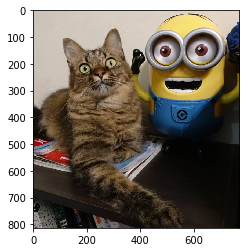

In [32]:
import skimage.io as skio
img1 = skio.imread('data/examples/example.jpg')
plt.imshow(img1)
plt.show()

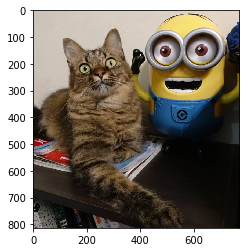

In [33]:
from PIL import Image
img2 = Image.open('data/examples/example.jpg') # 這時候還是 PIL object
img2 = np.array(img2)
plt.imshow(img2)
plt.show()

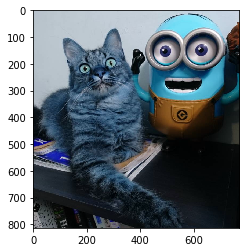

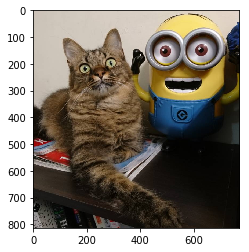

In [34]:
import cv2
img3 = cv2.imread('data/examples/example.jpg')
plt.imshow(img3)
plt.show()

img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
plt.imshow(img3)
plt.show()

### 比較三種開圖方式的時間 - 比較讀取 1000 次

In [35]:
N_times = 1000

In [36]:
%%timeit
im = np.array([skio.imread('data/examples/example.jpg') for _ in range(N_times)])

24.6 s ± 3.03 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [37]:
%%timeit
im = np.array([np.array(Image.open('data/examples/example.jpg')) for _ in range(N_times)])

24.1 s ± 2.64 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [38]:
%%timeit
im = np.array([cv2.cvtColor(cv2.imread('data/examples/example.jpg'), cv2.COLOR_BGR2RGB) for _ in range(N_times)])

27.2 s ± 66.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## 將影像存成 mat

In [39]:
import scipy.io as sio
sio.savemat(file_name='data/examples/example.mat', mdict={'img': img1})

In [40]:
mat_arr = sio.loadmat('data/examples/example.mat')
print(mat_arr.keys())

dict_keys(['__header__', '__version__', '__globals__', 'img'])


In [41]:
mat_arr = mat_arr['img']
print(mat_arr.shape)

(813, 771, 3)


In [ ]:
plt.imshow(mat_arr)
plt.show()

# 練習時間

## 1-1 讀取 txt 檔
* 請讀取 [text file](https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt)
* 懶人複製連結: https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt

## 1-2 將所提供的 txt 轉成 pandas dataframe

## 2. 從所提供的 txt 中的連結讀取圖片，請讀取上面 data frame 中的前 5 張圖片

## 讀取 txt 檔
* 請讀取 [text file](https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt)
* 懶人複製連結: https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt

### Hints: 使用 [Request](https://blog.gtwang.org/programming/python-requests-module-tutorial/) 抓取資料
### Hints: [字串分割](http://www.runoob.com/python/att-string-split.html)
### Hints: 例外處理: [Try-Except](https://pydoing.blogspot.com/2011/01/python-try.html)

In [1]:
## 假如我們不想把資料載到自己的電腦裡?
# 把連結填入
target_url = 'https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt'

In [2]:
import requests
response = requests.get(target_url)
data = response.text

# 用 request 傳送回來的資料不會認得斷行符號
print(len(data))
data[0:100]

784594


'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg\nn00015388_238\thttp://farm2'

In [5]:
# 找到換行符號，用該符號做字串分割後，把它拿掉
data_1 = data.replace('\t', '\n').split('\n')
print(len(data_1))
data_1[1:10:2]

19991


['http://farm1.static.flickr.com/145/430300483_21e993670c.jpg',
 'http://farm2.static.flickr.com/1005/3352960681_37b9c1d27b.jpg',
 'http://farm1.static.flickr.com/27/51009336_a9663af3dd.jpg',
 'http://farm4.static.flickr.com/3025/2444687979_bf7bc8df21.jpg',
 'http://img100.imageshack.us/img100/3253/forrest004fs9.jpg']

## 將 txt 轉成 pandas dataframe

In [6]:
import pandas as pd
#pd.set_option('display.max_colwidth', 110)
df = pd.DataFrame(data_1[1:10:2])
df.columns = ['link']
df.head()
df[0:5]['link'].values

array(['http://farm1.static.flickr.com/145/430300483_21e993670c.jpg',
       'http://farm2.static.flickr.com/1005/3352960681_37b9c1d27b.jpg',
       'http://farm1.static.flickr.com/27/51009336_a9663af3dd.jpg',
       'http://farm4.static.flickr.com/3025/2444687979_bf7bc8df21.jpg',
       'http://img100.imageshack.us/img100/3253/forrest004fs9.jpg'],
      dtype=object)

## 讀取圖片，請讀取上面 data frame 中的前 5 張圖片

In [7]:
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt

# 請用 df.loc[...] 得到第一筆資料的連結
first_link = df.loc[0,'link']
response = requests.get(first_link)
img = Image.open(BytesIO(response.content))
img = np.array(img)

# Convert img to numpy array
plt.imshow(img)
plt.show()

<Figure size 640x480 with 1 Axes>

In [8]:
def img2arr_fromURLs(url_list, resize = False):
    """
    請完成這個 Function
    Args
        - url_list: list of URLs
        - resize: bool
    Return
        - list of array
    """
    img_list = []
    for url in url_list:
        response = requests.get(url)
        try:
            img = Image.open(BytesIO(response.content))
            if resize:
                img = img.resize((400,400))
            img = np.array(img)
            img_list.append(img)
        except:
            pass
    return img_list

Total images that we got: 4 


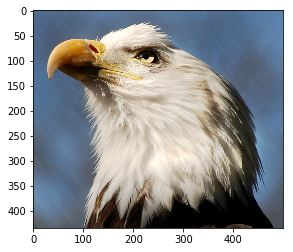

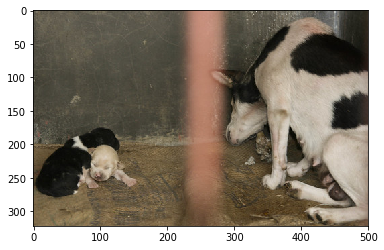

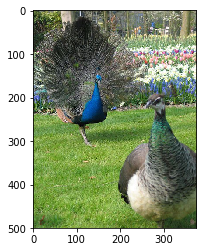

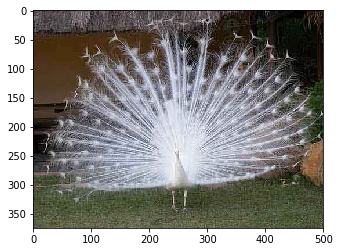

In [9]:
result = img2arr_fromURLs(df[0:5]['link'].values)
print("Total images that we got: %i " % len(result)) # 如果不等於 5, 代表有些連結失效囉

for im_get in result:
    plt.imshow(im_get)
    plt.show()